# Part A

Classification
Classes:


*   WALKING
*   WALKING_UPSTAIRS
*   WALKING_DOWNSTAIRS
*   SITTING
*   STANDING
*   LAYING

Data




In [ ]:
from google.colab import files
files.upload()
! mkdir -p ~/.kaggle
! mv kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d uciml/human-activity-recognition-with-smartphones

! unzip -qqo human-activity-recognition-with-smartphones

Saving kaggle.json to kaggle.json
 90% 22.0M/24.5M [00:00<00:00, 35.6MB/s]
100% 24.5M/24.5M [00:00<00:00, 33.2MB/s]


In [ ]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("train.shape", train.shape)

train.shape (7352, 563)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.data import Dataset
import numpy as np

batch_size = 1024  # training go vroom vroom

# convert the category names to numbers
categories = {}
num_categories = 0
for activity in train["Activity"]:
  if categories.get(activity, -1) < 0:
    categories[activity] = num_categories
    num_categories += 1

x_train = train.drop(columns=['subject', 'Activity']).values
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
y_train = utils.to_categorical([categories[activity] for activity in train['Activity']])  # one hot encode the categories

print("x_train.shape, ", x_train.shape, ", y_train.shape, ", y_train.shape)

full_train_data = Dataset.from_tensor_slices((x_train, y_train))

train_size = int(0.70 * x_train.shape[0])

train_data = full_train_data.take(train_size).batch(batch_size).prefetch(2)
valid_data = full_train_data.skip(train_size).batch(batch_size).prefetch(2)

print(valid_data)

x_test = test.drop(columns=['subject', 'Activity']).values
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
y_test = utils.to_categorical([categories[activity] for activity in test['Activity']])

test_data = Dataset.from_tensor_slices((x_test, y_test))
test_data = test_data.batch(batch_size).prefetch(2)

num_features = x_train.shape[-1]

x_train.shape,  (7352, 1, 561) , y_train.shape,  (7352, 6)
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 1, 561), dtype=tf.float64, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

callbacks = [
  keras.callbacks.ModelCheckpoint("model.keras",
  save_best_only=True)
]

def build_model(p1=128, p2=0.5, p3=64):
  inputs = keras.Input(shape=(1, num_features))
  current_layer = layers.LSTM(p1)(inputs)
  current_layer = layers.Dropout(p2)(current_layer)
  current_layer = layers.Dense(p3, activation="relu")(current_layer)
  outputs = layers.Dense(num_categories, activation="softmax")(current_layer)
  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(loss="categorical_crossentropy",
  optimizer="adam",
  metrics=["accuracy"])
  return model

In [ ]:
model = build_model(p1=128, p2=0.5, p3=64)

history = model.fit(
 train_data,
 epochs=100,
 validation_data=valid_data,
 callbacks=callbacks
 )
s = model.evaluate(x_test, y_test, verbose=0)
s

Epoch 1/100
6/6 [==============================] - 6s 211ms/step - loss: 1.6291 - accuracy: 0.3146 - val_loss: 1.3989 - val_accuracy: 0.5109
Epoch 2/100
6/6 [==============================] - 0s 28ms/step - loss: 1.2980 - accuracy: 0.4332 - val_loss: 1.0728 - val_accuracy: 0.4438
Epoch 3/100
6/6 [==============================] - 0s 28ms/step - loss: 1.0312 - accuracy: 0.5490 - val_loss: 0.9094 - val_accuracy: 0.5888
Epoch 4/100
6/6 [==============================] - 0s 29ms/step - loss: 0.8600 - accuracy: 0.6551 - val_loss: 0.7598 - val_accuracy: 0.7180
Epoch 5/100
6/6 [==============================] - 0s 28ms/step - loss: 0.7388 - accuracy: 0.6877 - val_loss: 0.6659 - val_accuracy: 0.7344
Epoch 6/100
6/6 [==============================] - 0s 30ms/step - loss: 0.6234 - accuracy: 0.7522 - val_loss: 0.5224 - val_accuracy: 0.8382
Epoch 7/100
6/6 [==============================] - 0s 28ms/step - loss: 0.5310 - accuracy: 0.7845 - val_loss: 0.4857 - val_accuracy: 0.8422
Epoch 8/100
6/6 [==

[0.22305560111999512, 0.9277231097221375]

In [ ]:
s = model.evaluate(x_test, y_test, verbose=0)
s

[0.22305560111999512, 0.9277231097221375]

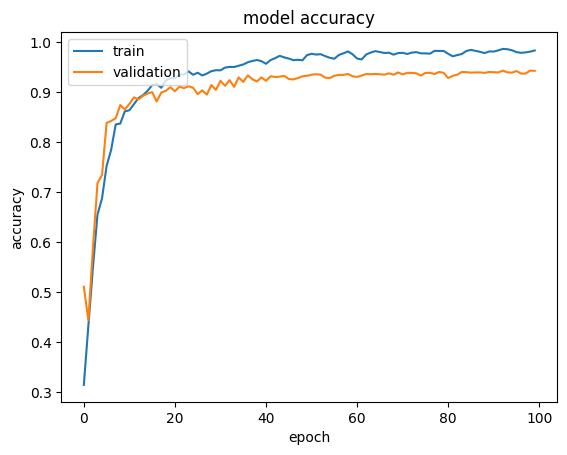

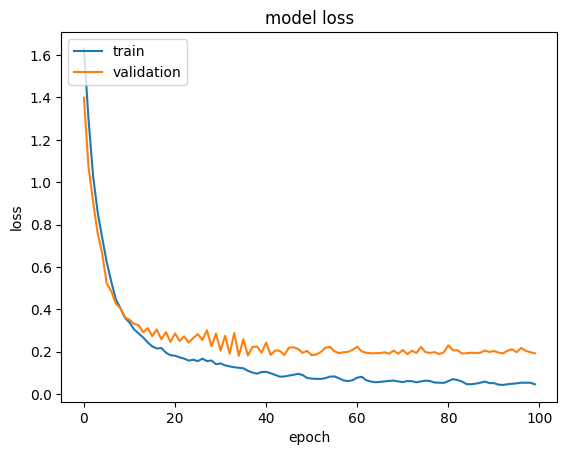

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Part B



In [ ]:
from google.colab import drive
import pandas as pd

try:
  drive.mount('/content/drive')
except KeyError:
  import os
  # For local runtimes
  try:
    os.makedirs('drive/MyDrive')
  except FileExistsError:
    pass

In [ ]:
skipFirst = [0, 1, 3]
for num in range(4, 17571, 2):
  skipFirst.append(num)

skip = [0, 1]
for num in range(4, 17523, 2):
  skip.append(num)

Weather2012 = pd.read_csv('drive/MyDrive/Weather2012.csv', skiprows=skipFirst)
Weather2013 = pd.read_csv('drive/MyDrive/Weather2013.csv', skiprows=skip)
Weather2014 = pd.read_csv('drive/MyDrive/Weather2014.csv', skiprows=skip)
Weather2015 = pd.read_csv('drive/MyDrive/Weather2015.csv', skiprows=skip)

Electrical2012 = pd.read_csv('drive/MyDrive/Electrical2012.csv')
Electrical2013 = pd.read_csv('drive/MyDrive/Electrical2013.csv')
Electrical2014 = pd.read_csv('drive/MyDrive/Electrical2014.csv')
Electrical2015 = pd.read_csv('drive/MyDrive/Electrical2015.csv')

In [ ]:
weather = []
weather.append(Weather2012)
weather.append(Weather2013)
weather.append(Weather2014)
weather.append(Weather2015)

weather_df = pd.concat(weather, ignore_index=True)

weather_df.to_csv('weather.csv', index=False)

In [ ]:
electical = []
electical.append(Electrical2012)
electical.append(Electrical2013)
electical.append(Electrical2014)
electical.append(Electrical2015)

electrical_df = pd.concat(electical, ignore_index=True)
electrical_df.drop(electrical_df.tail(1).index,inplace=True)

electrical_df.to_csv('electical.csv', index=False)

In [ ]:
# remove some values to offset the predictions by an hour
electrical_future_df = electrical_df.copy(deep=True)

electrical_future_df.drop(0,inplace=True)
electrical_future_df.reset_index(inplace=True)

electrical_df.drop(electrical_df.tail(1).index,inplace=True)
weather_df.drop(weather_df.tail(1).index,inplace=True)

In [ ]:
combinedData = weather_df.join(electrical_df.add_suffix(".now")).join(electrical_future_df.add_suffix(".future"))

combinedData.to_csv('combined.csv', index=False)
test_split_point = int(len(combinedData) * 0.8)
validation_split_point = int(len(combinedData) * 0.6)

train = combinedData[:validation_split_point]
test = combinedData[test_split_point:]
validation = combinedData[validation_split_point:test_split_point]

combinedData

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Dew Point,Cloud Type,...,Hour_End.future,COAST.future,EAST.future,FAR_WEST.future,NORTH.future,NORTH_C.future,SOUTHERN.future,SOUTH_C.future,WEST.future,ERCOT.future
0,2012,1,1,1,0,13.1,0,0,-2.5,0,...,1/1/2012 2:00,7559.728089,839.092904,1294.272245,643.483530,8553.212708,2047.755534,4070.416593,845.097364,25853.05897
1,2012,1,1,2,0,11.9,0,0,-2.7,0,...,1/1/2012 3:00,7337.789042,817.995707,1296.491345,631.940923,8461.317967,1961.909818,3946.994332,840.902849,25295.34198
2,2012,1,1,3,0,11.0,0,0,-3.0,0,...,1/1/2012 4:00,7161.895539,814.967883,1297.417294,631.428520,8438.693857,1893.148232,3884.929253,845.452257,24967.93284
3,2012,1,1,4,0,10.5,0,0,-3.0,0,...,1/1/2012 5:00,6984.460743,843.952578,1309.534911,640.892563,8565.433348,1867.358425,3911.610238,862.369386,24985.61219
4,2012,1,1,5,0,10.3,0,0,-2.9,0,...,1/1/2012 6:00,6852.747302,883.708533,1329.677512,662.237775,8880.412604,1874.075024,4037.150795,892.341115,25412.35066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35057,2015,12,31,18,0,9.1,76,944,0.7,7,...,12/31/2015 19:00,10743.720990,1449.531975,2206.959175,890.950782,13768.250380,3434.009672,6567.961704,1269.137961,40330.52264
35058,2015,12,31,19,0,9.9,77,954,0.6,7,...,12/31/2015 20:00,10436.555930,1355.505824,2200.797530,873.920708,13413.202230,3325.388189,6410.274352,1252.891804,39268.53657
35059,2015,12,31,20,0,10.0,76,941,0.7,7,...,12/31/2015 21:00,10117.139850,1314.445489,2179.300089,860.342391,13004.190740,3178.545879,6186.765392,1234.948091,38075.67792
35060,2015,12,31,21,0,9.5,71,897,0.9,7,...,12/31/2015 22:00,9836.114934,1330.866082,2154.405686,840.608568,12578.409750,3054.399972,5919.270362,1215.899839,36929.97519


In [ ]:
from tensorflow import keras

sampling_rate = 4
sequence_length = int(14 * 24 / sampling_rate)
features = ["Temperature", "Relative Humidity", "Solar Zenith Angle", "Surface Albedo", "Pressure", "Precipitable Water", "Wind Direction", "Wind Speed", "Dew Point", "COAST.now", "EAST.now", "FAR_WEST.now", "NORTH.now", "NORTH_C.now", "SOUTHERN.now", "SOUTH_C.now", "WEST.now", "ERCOT.now"]
values = ["ERCOT.future"]

num_features = len(features)
num_categories = len(values)

def build_dataset(section):
  return keras.utils.timeseries_dataset_from_array(
      data=train[features],
      targets=train[values],
      sequence_length=sequence_length,
      sequence_stride = 1,
      sampling_rate = sampling_rate,
      batch_size=512,
  ).prefetch(4)

train_dataset = build_dataset(train)
validation_dataset = build_dataset(validation)
test_dataset = build_dataset(test)

In [ ]:
from tensorflow.keras import layers

callbacks = [
  keras.callbacks.ModelCheckpoint("model.keras",
  save_best_only=True)
]

adapt_data = train[features]

def build_model(p1=55, p2=50, p3=0.5, p4=64):
  inputs = keras.Input(shape=(sequence_length, num_features))
  current_layer = inputs
  normalization_layer = layers.Normalization()
  normalization_layer.adapt(adapt_data)
  print("Normalization: ", normalization_layer.mean.numpy(), ", ", normalization_layer.variance.numpy())
  current_layer = normalization_layer(current_layer)
  current_layer = layers.LSTM(p1, return_sequences=True)(current_layer)
  current_layer = layers.LSTM(p2)(current_layer)
  #current_layer = layers.Dropout(p3)(current_layer)
  current_layer = layers.Dense(p4, activation="relu")(current_layer)
  outputs = layers.Dense(num_categories, activation="relu")(current_layer)
  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(loss="mse",
  optimizer="adam",
  metrics=["mae", "mape"])
  return model

In [ ]:
model1 = build_model(p1=55, p2=50, p3=0.5, p4=64)

Normalization:  [[1.7957024e+01 4.2911877e+01 9.0004959e+01 2.4612826e-01 8.8843353e+02
  1.5941863e+00 1.8595168e+02 3.3899574e+00 2.6537185e+00 1.0504599e+04
  1.3567068e+03 1.6076722e+03 8.2950476e+02 1.2586935e+04 3.0365701e+03
  6.1190312e+03 1.0673475e+03 3.7108340e+04]] ,  [[9.2299339e+01 5.3253845e+02 1.6552871e+03 1.3034384e-03 1.7868738e+01
  1.1125331e+00 7.3443115e+03 2.7982583e+00 8.8595741e+01 5.7163260e+06
  9.8291133e+04 5.0564996e+04 3.0986834e+04 1.1217806e+07 5.5354244e+05
  2.5740562e+06 4.9119055e+04 7.5093088e+07]]


In [ ]:
history1 = model1.fit(
 train_dataset,
 epochs=5000,
 validation_data=validation_dataset,
 callbacks=callbacks
 )

s = model1.evaluate(test_dataset, verbose=0)
s
# 72h 1302859008.0

Streaming output truncated to the last 5000 lines.
41/41 [==============================] - 3s 73ms/step - loss: 92955.8438 - mae: 238.1122 - mape: 0.6632 - val_loss: 125189.5859 - val_mae: 277.7572 - val_mape: 0.7812
Epoch 2502/5000
41/41 [==============================] - 3s 71ms/step - loss: 100628.0625 - mae: 248.1989 - mape: 0.6846 - val_loss: 191437.3594 - val_mae: 353.1392 - val_mape: 0.9843
Epoch 2503/5000
41/41 [==============================] - 3s 72ms/step - loss: 112936.5547 - mae: 262.2345 - mape: 0.7191 - val_loss: 290279.0000 - val_mae: 443.5513 - val_mape: 1.2464
Epoch 2504/5000
41/41 [==============================] - 3s 71ms/step - loss: 117445.0469 - mae: 268.4466 - mape: 0.7407 - val_loss: 403475.8438 - val_mae: 511.7651 - val_mape: 1.4768
Epoch 2505/5000
41/41 [==============================] - 3s 70ms/step - loss: 111970.0938 - mae: 263.2732 - mape: 0.7373 - val_loss: 386518.4375 - val_mae: 489.9998 - val_mape: 1.4578
Epoch 2506/5000
41/41 [=======================

[101211.25, 249.3516082763672, 0.6700438857078552]

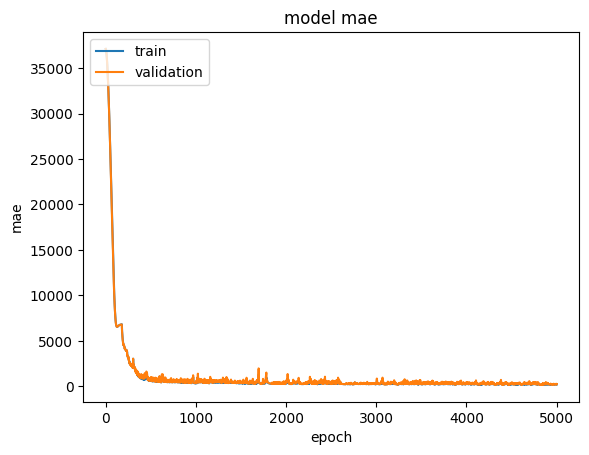

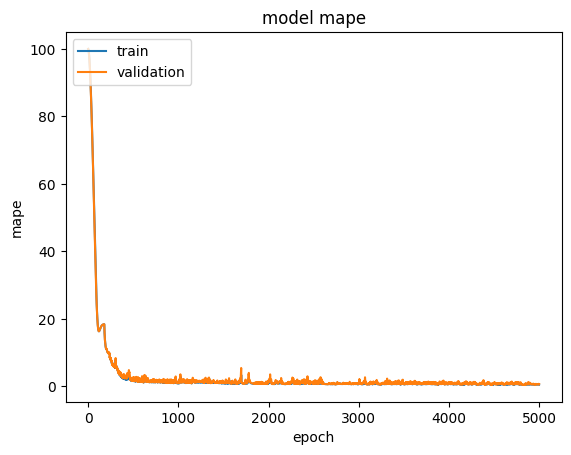

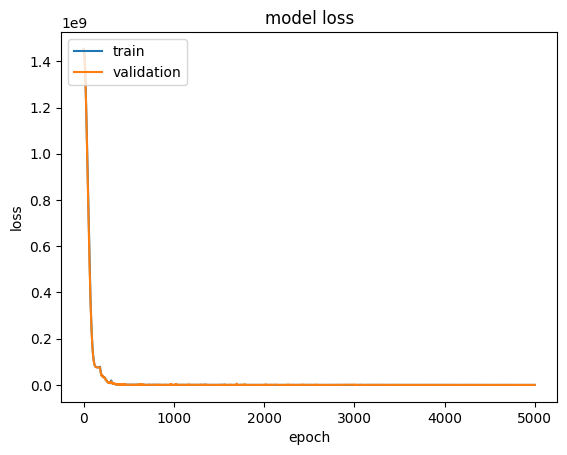

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['mae'])
plt.plot(history1.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history1.history['mape'])
plt.plot(history1.history['val_mape'])
plt.title('model mape')
plt.ylabel('mape')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()